# Gender Classification Using Multiple Models


---


© 2024, Zaka AI, Inc. All Rights Reserved

In this notebook, you will predict the class of the gender, using this [Gender Classification Dataset](https://drive.google.com/file/d/1W9S0ubAjFEuZ-CyGO_BbVbDISoHPy-1D/view?usp=sharing), based on a couple of other factors mentioned below, using multiple supervised learning classification algorithms. At the end, you will apply hypothesis testing to compare between the best models.

The dataset contains the following features:

- **long_hair**: [0 for No, 1 for Yes]
- **forehead_width_cm**: Width of the forehead in centimeters.
- **forehead_height_cm**: Height of the forehead in centimeters.
- **nose_wide**: [0 for No, 1 for Yes]
- **nose_long**: [0 for No, 1 for Yes]
- **lips_thin**:[0 for No, 1 for Yes]
- **distance_nose_to_lip_long**: [0 for No, 1 for Yes]
- **gender**: Gender of the individual. [Male, Female]

#Import Libraries

**Import Libraries**

In [ ]:
install.packages("ggplot2")
install.packages("reshape2")
install.packages("caret")
install.packages("randomForest")
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)
library(reshape2)
library(caret)
library(randomForest)
library(e1071)

Loading required package: lattice

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




#Load Dataset

**Import the gender classification dataset**

In [ ]:
df <- read.csv("/content/gender_classification.csv")


   #Test Your Zaka

#Exploratory Data Analysis

**Show the first 5 rows of the dataframe**

In [ ]:
#Test Your Zaka
head(df, 5)


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>
1,1,11.8,6.1,1,0,1,1,Male
2,0,14.0,5.4,0,0,1,0,Female
3,0,11.8,6.3,1,1,1,1,Male
4,0,14.4,6.1,0,1,1,1,Male
5,1,13.5,5.9,0,0,0,0,Female


**Show the tail of the dataframe**

In [ ]:
#Test Your Zaka
tail(df)


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>
4996,1,12.3,6.9,0,1,1,1,Male
4997,1,13.6,5.1,0,0,0,0,Female
4998,1,11.9,5.4,0,0,0,0,Female
4999,1,12.9,5.7,0,0,0,0,Female
5000,1,13.2,6.2,0,0,0,0,Female
5001,1,15.4,5.4,1,1,1,1,Male


**Use str() method to show the structure of the dataframe, the datatypes, and the unique values**

In [ ]:
#Test Your Zaka
str(df)


'data.frame':	5001 obs. of  8 variables:
 $ long_hair                : int  1 0 0 0 1 1 1 0 1 1 ...
 $ forehead_width_cm        : num  11.8 14 11.8 14.4 13.5 13 15.3 13 11.9 12.1 ...
 $ forehead_height_cm       : num  6.1 5.4 6.3 6.1 5.9 6.8 6.2 5.2 5.4 5.4 ...
 $ nose_wide                : int  1 0 1 0 0 1 1 0 1 0 ...
 $ nose_long                : int  0 0 1 1 0 1 1 0 0 0 ...
 $ lips_thin                : int  1 1 1 1 0 1 1 0 1 0 ...
 $ distance_nose_to_lip_long: int  1 0 1 1 0 1 0 0 1 0 ...
 $ gender                   : chr  "Male" "Female" "Male" "Male" ...


**Show the statistical summary of the dataframe**

In [ ]:
#Test Your Zaka
summary(df)


   long_hair      forehead_width_cm forehead_height_cm   nose_wide     
 Min.   :0.0000   Min.   :11.40     Min.   :5.100      Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:12.20     1st Qu.:5.500      1st Qu.:0.0000  
 Median :1.0000   Median :13.10     Median :5.900      Median :0.0000  
 Mean   :0.8696   Mean   :13.18     Mean   :5.946      Mean   :0.4939  
 3rd Qu.:1.0000   3rd Qu.:14.00     3rd Qu.:6.400      3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :15.50     Max.   :7.100      Max.   :1.0000  
   nose_long        lips_thin      distance_nose_to_lip_long    gender         
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000            Length:5001       
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000            Class :character  
 Median :1.0000   Median :0.0000   Median :0.0000            Mode  :character  
 Mean   :0.5079   Mean   :0.4931   Mean   :0.4989                              
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000                              
 Max.   :1.0000 

**Plot a pie chart about the gender percentages:**

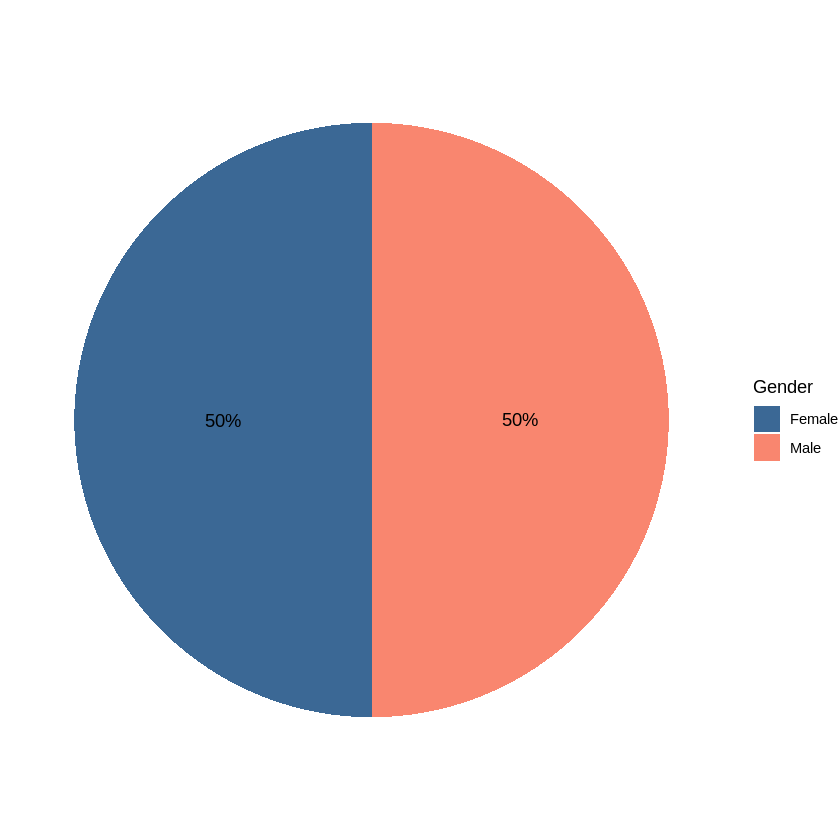

In [ ]:
gender_counts <- table(df$gender)

# Convert to dataframe
df_gender <- as.data.frame(gender_counts)

# Name the columns of this dataframe
names(df_gender) <- c("Gender", "Count")

# Creating the pie chart
ggplot(df_gender, aes(x = "", y = Count, fill = Gender)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  scale_fill_manual(values = c("#3B6895", "#F9866F")) +
  labs(fill = "Gender") +
  geom_text(aes(label = paste0(round(Count / sum(Count) * 100, 1), "%")), position = position_stack(vjust = 0.5))



**Do we have an imbalance in the dataset?**

Share Your Zaka here

**Given that the pie chart shows a 50% male and 50% female distribution, there is no imbalance in the dataset. An imbalanced dataset typically occurs when one class significantly outweighs the others. In this case, both genders are equally represented, so the dataset is balanced.**

Plot the correlation matrix between the available columns

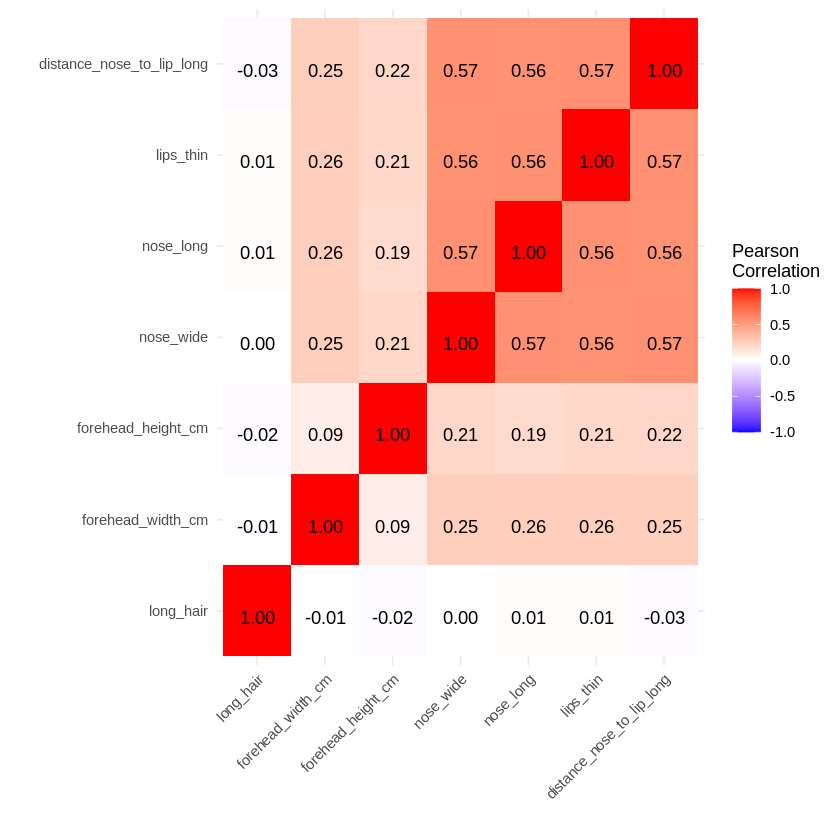

In [ ]:

corr_matrix <- cor(df[, sapply(df, is.numeric)], use = "complete.obs")

# Creating the heatmap
ggplot(melt(corr_matrix), aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", midpoint = 0, limits = c(-1, 1)) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_text(aes(label = sprintf("%.2f", value)), vjust = 1) +
  labs(x = "", y = "", fill = "Pearson\nCorrelation")




**Can you find highly correlated features?**

Share Your Zaka here

**Based on the heatmap :
The feature nose_wide has a perfect correlation with itself (as expected), showing a correlation coefficient of 1.
forehead_height_cm and nose_wide seem to have a higher positive correlation
 (0.56).
forehead_height_cm and forehead_width_cm have a noticeable positive correlation (0.55).
nose_long also shows a relatively higher positive correlation with forehead_height_cm (0.56).
These correlations suggest that certain features are somewhat related to each other, which might be useful in the modeling process or for dimensionality reduction techniques like PCA.**

# Data Preprocessing

**Remove duplicate rows and show their count after removal**

In [ ]:
#Test Your Zaka

df <- df[!duplicated(df), ]

# Display the number of rows after removing duplicates
nrow(df)


[1] 3233

**Convert the gender column to the factor data type**

In [ ]:
# Convert 'gender' to a factor
df$gender <- as.factor(df$gender)
  #Test Your Zaka

# Display the head of the dataframe
head(df)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<fct>
1,1,11.8,6.1,1,0,1,1,Male
2,0,14.0,5.4,0,0,1,0,Female
3,0,11.8,6.3,1,1,1,1,Male
4,0,14.4,6.1,0,1,1,1,Male
5,1,13.5,5.9,0,0,0,0,Female
6,1,13.0,6.8,1,1,1,1,Male


**Split the data into 80% for training and 20% for testing:**

In [ ]:
# Create indices for the training set
trainIndex <- createDataPartition(df$gender, p = 0.8, list = FALSE)

# Split the data into training and testing sets
train_df <- df[trainIndex, ]
test_df <- df[-trainIndex, ]

In [ ]:
# Print the dimensions of train_df and test_df
dim(train_df)
dim(test_df)

[1] 2587    8

[1] 646   8

#Creating Models

# **Naive Bayes Model**

**Train a model using the Naive Bayes algorithm**

In [ ]:
# Fit the Naive Bayes model on the training data
nb_model <- naiveBayes(gender ~ ., data = train_df)

# Print the model summary
print(nb_model)


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
   Female      Male 
0.4483958 0.5516042 

Conditional probabilities:
        long_hair
Y             [,1]      [,2]
  Female 0.8155172 0.3880447
  Male   0.8346181 0.3716551

        forehead_width_cm
Y            [,1]      [,2]
  Female 12.82724 0.8704819
  Male   13.55032 1.1868752

        forehead_height_cm
Y            [,1]      [,2]
  Female 5.801034 0.4268984
  Male   6.090119 0.5990471

        nose_wide
Y             [,1]      [,2]
  Female 0.1715517 0.3771530
  Male   0.8304135 0.3754007

        nose_long
Y             [,1]      [,2]
  Female 0.2068966 0.4052554
  Male   0.8542397 0.3529895

        lips_thin
Y             [,1]      [,2]
  Female 0.1956897 0.3969018
  Male   0.8156973 0.3878668

        distance_nose_to_lip_long
Y             [,1]      [,2]
  Female 0.1775862 0.3823289
  Male   0.8430273 0.3639025



**Evaluate the performance of the model by predicting the gender value based on the testing set**

In [ ]:
# Select input features for the test set, assuming the last column is the response variable 'gender'
test_features <- test_df[, -ncol(test_df)]

# Predict on the test set using the Naive Bayes model
y_pred_test <- predict(nb_model, newdata = test_features)


**Show the confusion matrix between the real gender labels of the test set, and the predicted ones**

In [ ]:
# Convert y_pred_test and test_df$gender to factors with the same levels
levels <- unique(test_df$gender)

y_pred_test <- factor(y_pred_test, levels = levels)
test_df$gender <- factor(test_df$gender, levels = levels)

# Create the confusion matrix
conf_matrix <- table(test_df$gender, y_pred_test)
conf_matrix

        y_pred_test
         Female Male
  Female    281    9
  Male       25  331

**Calculate the accuracy of the Naive Bayes Model**

In [ ]:
# Calculate the accuracy of the Naive Bayes predictions
nb_accuracy <- sum(y_pred_test == test_df$gender) / length(test_df$gender)

# Print the Naive Bayes accuracy as a percentage
nb_accuracy_percentage <- nb_accuracy * 100
print(paste("Naive Bayes Accuracy:", round(nb_accuracy_percentage, 2), "%"))



[1] "Naive Bayes Accuracy: 94.74 %"


# **Random Forest**

**Train a model using the Random Forest algorithm**

In [ ]:
# Train the Random Forest model
rf_model <- randomForest(gender ~ ., data = train_df, ntree = 100)

# Print the model summary
print(rf_model)


Call:
 randomForest(formula = gender ~ ., data = train_df, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 3.94%
Confusion matrix:
       Female Male class.error
Female   1123   37  0.03189655
Male       65 1362  0.04555011


**Evaluate the performance of the model by predicting the gender value based on the testing set**

In [ ]:
# Select input features
test_features <- test_df[, -ncol(test_df)]

# Predict on the test set
y_pred_test <- predict(rf_model, newdata = test_features)


**Show the confusion matrix between the real gender labels of the test set, and the predicted ones**

In [ ]:
# Convert both y_pred_test and test_df$gender to factors with the same levels
levels <- unique(test_df$gender)

y_pred_test <- factor(y_pred_test, levels = levels)
test_df$gender <- factor(test_df$gender, levels = levels)

# Create and print the confusion matrix
conf_matrix <- table(test_df$gender, y_pred_test)
print(conf_matrix)


        y_pred_test
         Female Male
  Female    282    8
  Male       20  336


**Calculate the accuracy of the Random Forest Model**

In [ ]:
rf_accuracy <- sum(y_pred_test == test_df$gender) / length(test_df$gender)

# Print the Random Forest accuracy as a percentage
rf_accuracy_percentage <- rf_accuracy * 100
print(paste("Random Forest Accuracy:", round(rf_accuracy_percentage, 2), "%"))

[1] "Random Forest Accuracy: 95.67 %"


# **SVM**

**Train a model using the SVM algorithm**

In [ ]:
# Train the SVM model
svm_model <- svm(gender ~ ., data = train_df)

# Print the model summary
print(svm_model)



Call:
svm(formula = gender ~ ., data = train_df)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  323



**Evaluate the performance of the model by predicting the gender value based on the testing set**

In [ ]:
# Select input features from test data
test_features <- test_df[, -ncol(test_df)]

# Predict on the test set using the SVM model
y_pred_test <- predict(svm_model, newdata = test_features)

**Show the confusion matrix between the real gender labels of the test set, and the predicted ones**

In [ ]:
# Convert both y_pred_test and test_df$gender to factors with the same levels
levels <- unique(test_df$gender)

y_pred_test <- factor(y_pred_test, levels = levels)
test_df$gender <- factor(test_df$gender, levels = levels)

# Confusion matrix
conf_matrix <- table(test_df$gender, y_pred_test)
print(conf_matrix)

        y_pred_test
         Female Male
  Female    282    8
  Male       24  332


**Calculate the accuracy of the SVM Model**

In [ ]:
# Calculate accuracy
SVM_accuracy <- sum(y_pred_test == test_df$gender) / length(test_df$gender)

# Print the SVM model accuracy as a percentage
SVM_accuracy_percentage <- SVM_accuracy * 100
print(paste("SVM Model Accuracy:", round(SVM_accuracy_percentage, 2), "%"))


[1] "SVM Model Accuracy: 95.05 %"


# **Comparing Between Models**

**Create a dataframe that shows the accuracies of each model**

In [ ]:
# Create the data frame
models <- data.frame(
  Model = c("Naive Bayes", "Random Forest", "SVM"),
  Test_Accuracy_Score = c(nb_accuracy_percentage, rf_accuracy_percentage, SVM_accuracy_percentage)
)

# View the data frame
print(models)



          Model Test_Accuracy_Score
1   Naive Bayes            94.73684
2 Random Forest            95.66563
3           SVM            95.04644


**What are the two models having the highest accuracies?**

Share Your Zaka here

**The two models with the highest accuracies are:
Random Forest with an accuracy of 95.66563%
SVM with an accuracy of 95.04644%**

**Do you think the difference between them is significant to prefer one over the other? We will be using the z-score test to see if there is a statistical difference between the models. We start by setting the Hypothesis:**

Null Hypothesis H0: The two models perform the same


Alternate Hypothesis H1: The two models do not perform the same

With a threshold alfa = 5%, we have a  z alpha/2 = 1.96 according to the z-table shown below:


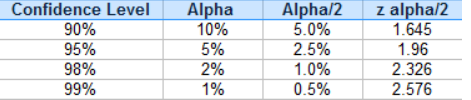

To calculate the value of z and the variances of the 2 models, we use the following formulas.

<img src="https://equatio-api.texthelp.com/svg/%5Csigma%5E2%3D%5Cfrac%7BAcc%5Ccdot%5Cleft(1-Acc%5Cright)%7D%7Bn%7D" alt="sigma squared equals the fraction with numerator A c c times open paren 1 minus A c c close paren and denominator n">
<br><img src="https://equatio-api.texthelp.com/svg/Z%5C%20%3D%5C%20%5Cfrac%7B%5Cleft(Acc_1-Acc_2%5Cright)%7D%7B%5Csqrt%7B%5Csigma_1%5E2%2B%5Csigma_2%5E2%7D%7D" alt="Z equals the fraction with numerator open paren A c c sub 1 minus A c c sub 2 close paren and denominator the square root of sigma sub 1 squared plus sigma sub 2 squared">

In [ ]:
# Define the accuracies (replace with actual values)
acc1 <- 0.9566563
acc2 <- 0.9504644

# Get the sample size from the test data
test_df_sample_size <- 1000

# Calculate the variances
var1 <- (acc1 * (1 - acc1)) / test_df_sample_size
var2 <- (acc2 * (1 - acc2)) / test_df_sample_size

# Compute the z-score
z <- (acc1 - acc2) / sqrt(var1 + var2)
print(z)

# Z value for a 95% confidence level
z_alpha_over_2 <- 1.96

# Decision rule
if (abs(z) < z_alpha_over_2) {
  cat('The z value is smaller than the Z threshold, which means we fail to reject the null hypothesis, the difference in the accuracies is not significant.')
} else {
  cat('The z value is greater than the Z threshold, which means we reject the null hypothesis, the difference in the accuracies is significant. Thus, the model with the higher accuracy is indeed better than the other model.')
}

[1] 0.6580174
The z value is smaller than the Z threshold, which means we fail to reject the null hypothesis, the difference in the accuracies is not significant.